<a href="https://colab.research.google.com/github/bobbyknit007/ML/blob/main/Regression/Lasso_Regresssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings
filterwarnings('ignore')

In [120]:
data ={
    'X': list(range(1,21)),
    'Y': [2 * x**2 + 3 * x + 5 for x in range(1, 21)]
}
df= pd.DataFrame(data)

In [121]:
X = df[['X']]
y= df['Y']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2 )# removed random_state =42


In [122]:
poly=PolynomialFeatures(degree=5)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)# does nt allow model to learn about data

In [123]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [124]:
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

In [125]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Polynomial Regression, Mean Sqaured Error predicted and actual value of TRAINING data {}, expo {}'.format( "%.25f" %mse_train, mse_train))
print('Polynomial Regression, Mean Sqaured Error predicted and actual value of **TEST** data {}, expo {}'.format(  "%.25f" %mse_test, mse_test))

Polynomial Regression, Mean Sqaured Error predicted and actual value of TRAINING data 0.0000000000000000000045382, expo 4.5381993681573215e-21
Polynomial Regression, Mean Sqaured Error predicted and actual value of **TEST** data 0.0000000000000000000012544, expo 1.2543685079419489e-21


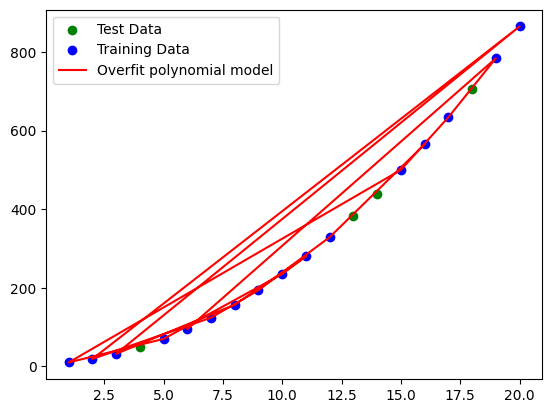

In [126]:
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, y_pred_train, color='red', label='Overfit polynomial model')

plt.legend()
plt.show()

Polynomial Regression, Mean Sqaured Error predicted and actual value of TRAINING data 0.0000000000000000002065490, expo 2.0654903227581751e-19 </br>
Polynomial Regression, Mean Sqaured Error predicted and actual value of **TEST** data 0.0000000000000000001378445, expo 1.3784449769403322e-19 </br>
<span color='red'>
**The errors are comparable for training and test data , However since error is very small for test data , the model is marked as "overfitting model" , Is it ?**
</span>

In [127]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_poly_train, y_train)
y_lasso_pred_train = lasso.predict(X_poly_train)
y_lasso_pred_test = lasso.predict(X_poly_test)
mse_train = mean_squared_error(y_train, y_lasso_pred_train)
mse_test = mean_squared_error(y_test, y_lasso_pred_test)
print('Lasso Polynomial Regression, Mean Sqaured Error predicted and actual value of TRAINING data {}, expo {}'.format( "%.25f" %mse_train, mse_train))
print('Lasso Polynomial Regression, Mean Sqaured Error predicted and actual value of **TEST** data {}, expo {}'.format(  "%.25f" %mse_test, mse_test))

Lasso Polynomial Regression, Mean Sqaured Error predicted and actual value of TRAINING data 0.3496265225097339723880907, expo 0.349626522509734
Lasso Polynomial Regression, Mean Sqaured Error predicted and actual value of **TEST** data 0.4324238630256895810077822, expo 0.4324238630256896


With Lasso , The error with training data is not very small , suggesting not a overfitting model.
With traiing data, the error is even less, This shows a it's a good model

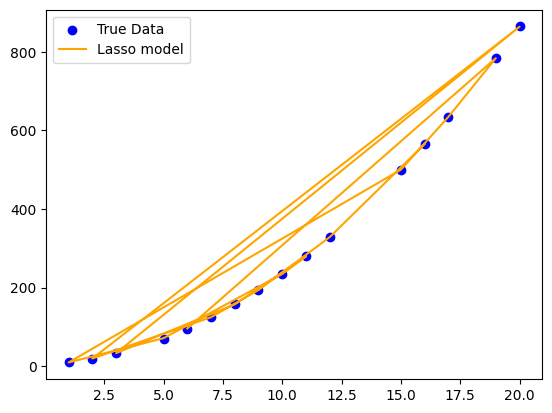

In [128]:
plt.scatter(X_train, y_train, color='blue', label='True Data')
#plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_lasso_pred_train, color='orange', label='Lasso model')
plt.legend()
plt.show()

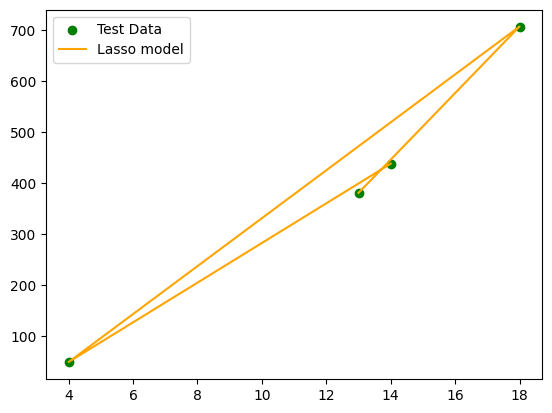

In [129]:
plt.scatter(X_test, y_test, color='green', label='Test Data')

plt.plot(X_test, y_lasso_pred_test, color='orange', label='Lasso model')
plt.legend()
plt.show()